# **Image Classification Model By Mirza Yasir Abdullah Baig**

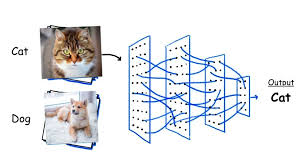

## **Step No: 1 Importing Some Important Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt
import numpy as np

## **Step No: 2 Training the Model**

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## **Step No: 3 Checking the Data Shape**

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## **Step No: 4 Converting the 2D Array in to 1D Array**

In [7]:
# ci==onvert 2 day array in 1d
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [10]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

## **Step No: 5 Plotting the Images**

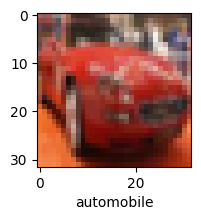

In [11]:
plot_sample(X_train, y_train, 5)

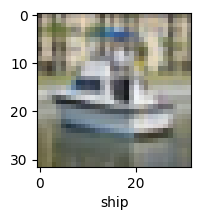

In [12]:
plot_sample(X_train, y_train, 501)

In [13]:
X_train = X_train/255.0
X_test = X_test/255.0

## **Step No: 6 Training The Model**

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])


ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.3011 - loss: 1.9354
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 73ms/step - accuracy: 0.4200 - loss: 1.6454
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.4595 - loss: 1.5463
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.4733 - loss: 1.4943
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.4911 - loss: 1.4466


## **Step No: 7 Classification Report**

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predictions on test set
y_pred = ann.predict(X_test)                       # shape (10000, num_classes)
y_pred_classes = [np.argmax(element) for element in y_pred]


print('Classification report:\n', classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.33      0.46      1000
           1       0.77      0.33      0.47      1000
           2       0.35      0.45      0.39      1000
           3       0.34      0.38      0.36      1000
           4       0.50      0.30      0.38      1000
           5       0.42      0.34      0.38      1000
           6       0.50      0.56      0.53      1000
           7       0.49      0.61      0.55      1000
           8       0.50      0.74      0.60      1000
           9       0.47      0.69      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [16]:
import seaborn as sn


In [ ]:
plt.figure(figsize=(14,7))
sn.heatmap(y_pred, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 classes for CIFAR-10
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 38ms/step - accuracy: 0.3628 - loss: 1.7465
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.5781 - loss: 1.2012
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.6366 - loss: 1.0406
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.6720 - loss: 0.9476
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.6936 - loss: 0.8891
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.7122 - loss: 0.8315
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7328 - loss: 0.7777
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7461 - loss: 0.7374
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7600 - loss: 0.6929
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.7694 - loss: 0.6667


In [22]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6899 - loss: 0.9368


[0.9407945275306702, 0.6886000037193298]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[3.10334464e-04, 1.43598972e-05, 5.54382103e-03, 9.21956301e-01,
        3.36896186e-03, 6.37780353e-02, 4.32472705e-04, 1.04066014e-04,
        4.45054704e-03, 4.12322734e-05],
       [1.33881881e-03, 5.78438975e-02, 7.25471318e-06, 2.02641513e-06,
        1.32954056e-05, 1.00645750e-07, 3.63916143e-07, 5.19430841e-07,
        9.40172374e-01, 6.21256826e-04],
       [1.09211214e-01, 4.14641410e-01, 8.22430570e-03, 2.66855955e-02,
        3.74399032e-03, 4.12800396e-03, 5.67386800e-04, 3.76240979e-03,
        3.17850262e-01, 1.11185402e-01],
       [6.17232502e-01, 5.62411826e-03, 1.00798979e-02, 2.33917031e-03,
        1.45951996e-03, 1.45623533e-04, 2.81059649e-03, 1.28199854e-05,
        3.60252053e-01, 4.36519913e-05],
       [5.99391706e-06, 3.97693566e-06, 1.05553237e-03, 1.77265909e-02,
        6.94652796e-01, 1.54055562e-03, 2.85000116e-01, 1.34672273e-05,
        9.06705793e-07, 1.86311254e-07]], dtype=float32)

## **Step No 8: Testing The Model**

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5]

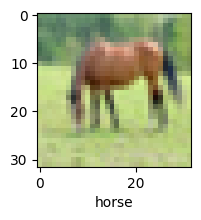

In [30]:
plot_sample(X_test, y_test, 60)

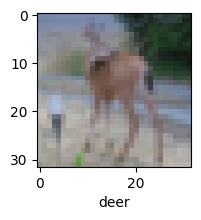

In [32]:
plot_sample(X_test, y_test, 100)

In [33]:
classes[y_classes[100]]

'deer'

# **Step No 9: Saving The Model**

In [34]:
cnn.save("cifar10_cnn_model.keras")  # recommended format


In [35]:
from tensorflow.keras.models import load_model
loaded_cnn = load_model("cifar10_cnn_model.keras")
loaded_cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.6899 - loss: 0.9368


[0.9407945275306702, 0.6886000037193298]